In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider, Button
import datetime as dt

In [8]:
# Propagate Equations 1-5 forward in time
def propagate(beta0, gamma, theta, delta, N, total_days):
    '''
    This code propagates Equations 1-5 forward in time.
    
    Here, beta is constant
    and there is no parameter alpha
    '''
    # .. Preallocate terms
    S = np.zeros(total_days)
    I = np.zeros(total_days)
    R = np.zeros(total_days)
    D = np.zeros(total_days)
    C = np.zeros(total_days)
    
    # .. Set 0th elements
    S[0] = N-1
    I[0] = 1
    
    # Propagate disease forward in time
    for t in range(total_days-1):
        # .. For each time step, get Eqns 1-5
        delta_S = - beta0 * S[t] * I[t]/N                   # Eqn (1)
        delta_I = beta0 * S[t] * I[t]/N - gamma * I[t]      # Eqn (2)
        delta_R = gamma * I[t] - theta * R[t]               # Eqn (3)
        delta_D = delta * theta * R[t]                      # Eqn (4)
        delta_C = (1-delta) * theta * R[t]                  # Eqn (5)
        
        # .. Increment S, I, R, D, and C
        S[t+1] = S[t] + delta_S                  # Susceptible
        I[t+1] = I[t] + delta_I                  # Infectious
        R[t+1] = R[t] + delta_R                  # Resolving
        D[t+1] = D[t] + delta_D                  # Deceased
        C[t+1] = C[t] + delta_C                  # ReCovered
    return S, I, R, D, C


In [3]:
# .. Parameters
N = 1e6                                # Total number of people
number_of_days_infectious = 5.         # length of time a person is infectious (days)
days_to_resolve = 10.                  # time for case to resolve after infectious (days)
delta = 0.008                          # death rate
beta0 = 0.44                           # infections/day/person

# .. Derived terms
gamma = 1/number_of_days_infectious   
theta = 1/days_to_resolve
R0 = beta0 / gamma                     # Basic reproduction number


In [4]:
# .. Print the basic reproduction number
print('R0 = beta / gamma: ', np.round(R0,2))       


R0 = beta / gamma:  2.2


In [17]:
%matplotlib inline


In [15]:
%matplotlib inline

Text(0.5, 1.0, 'SIRD model, constant R$_0 = \\beta/ \\gamma$ = 2.2')

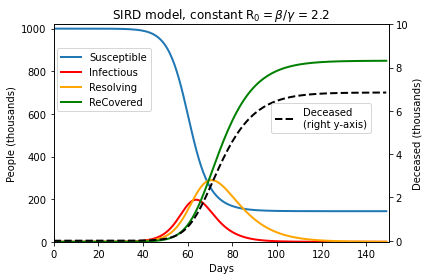

In [18]:
total_days = 150

# .. Propagate COVID-19 with a constant beta
S, I, R, D, C = propagate(beta0, gamma, theta, delta, N, total_days)

# .. Plot the SIRD model results
%matplotlib inline

fig, ax1 = plt.subplots(num = 1)

# .. Curves that use the left-hand y-axis
ax1.plot(S/1000, linewidth=2, label = 'Susceptible')
ax1.plot(I/1000, linewidth=2, color ='red', label = 'Infectious')
ax1.plot(R/1000, linewidth=2, color = 'orange', label = 'Resolving')
ax1.plot(C/1000, linewidth=2, color = 'green', label = 'ReCovered')

ax1.legend(loc=[.01,.6])
ax1.set_xlabel('Days')
ax1.set_ylabel('People (thousands)')
ax1.axis([0, 100, -.005, 1.02e3])

# .. Curves that use the right-hand y-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(D/1000, 'k--', linewidth=2, label='Deceased \n(right y-axis)')
ax2.set_ylabel('Deceased (thousands)', color = 'k')
ax2.tick_params(axis='y') 
ax2.legend(loc=[.65,.5])
ax2.axis([0, total_days, -.05, 10])
plt.title(r'SIRD model, constant R$_0 = \beta/ \gamma$ = ' + str(np.round(R0,2)))


In [11]:
# .. Set slider attributes that can be used here and reused later

# .. The reset button on the slider
def slider_reset(event):
    s_beta.reset()
    
# .. Color for slider elements
axcolor = 'grey'

In [13]:
import IPython

0

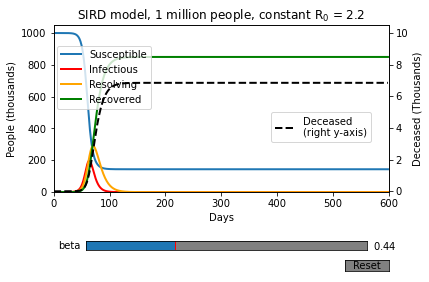

In [19]:
total_days = 600
%matplotlib inline

# .. Repeat the above but with a slider
fig, ax1 = plt.subplots(num=2)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.subplots_adjust(bottom=0.3)

# .. Propagate COVID-19 with a constant beta
S, I, R, D, C = propagate(beta0, gamma, theta, delta, N, total_days)

susceptible, = ax1.plot(S/1000, linewidth=2, label='Susceptible')
infectious, = ax1.plot(I/1000, color = 'red', linewidth=2, label='Infectious')
resolving, = ax1.plot(R/1000, color = 'orange', linewidth=2, label='Resolving')
recovered, = ax1.plot(C/1000, color = 'green', linewidth=2, label='Recovered')

ax1.legend(loc=[.01,.5])
ax1.set_xlabel('Days')
ax1.set_ylabel('People (thousands)')
ax1.axis([0, total_days, -.005, 1050])
ax1.set_title('SIRD model, 1 million people, constant R$_0$ = ' + str(np.round(beta0 / gamma,2)))

dead, = ax2.plot(D/1000, 'k--', linewidth=2, label='Deceased \n(right y-axis)')
ax2.legend(loc=[.65,.3])
ax2.axis([0, total_days, -.05, 10.5])
ax2.set_ylabel('Deceased (Thousands)')

# sliders
ax_beta = plt.axes([0.2, 0.1 , 0.65, 0.03], facecolor=axcolor)
s_beta = Slider(ax_beta, 'beta', 0.18, 1., valinit=beta0, valstep=0.01)

def update(val):
    
    beta0 = s_beta.val
    
    # .. Propagate COVID-19 with a constant beta
    S, I, R, D, C = propagate(beta0, gamma, theta, delta, N, total_days)

    susceptible.set_ydata(S/1000)
    infectious.set_ydata(I/1000)
    resolving.set_ydata(R/1000)
    recovered.set_ydata(C/1000)    
    dead.set_ydata(D/1000)
    ax1.set_title('SIRD model, constant R$_0$ = ' + str(np.round(beta0 / gamma, 2)))

    fig.canvas.draw_idle()
    
s_beta.on_changed(update)
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
    
button.on_clicked(slider_reset)


In [20]:
# .. Propagate COVID-19 with a constant beta
beta0 = 0.44                                       # infections/day/person
total_days = 200
S, I, R, D, C = propagate(beta0, gamma, theta, delta, N, total_days)


Text(0.5, 1.0, 'SIRD model, 1 million people, constant R$_0$ = 2.2')

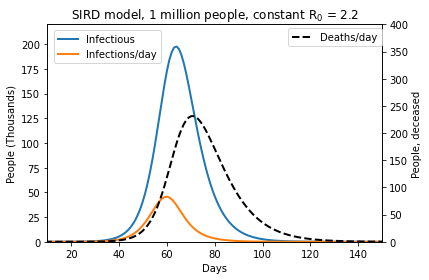

In [21]:
# .. Look at daily results for SIRD model
fig, ax1 = plt.subplots(num = 3)
ax2 = ax1.twinx()

ax1.plot(I/1000, linewidth = 2, label = 'Infectious')
ax1.plot(-(S[1:]-S[:-1])/1000, linewidth = 2, label = 'Infections/day')
ax1.legend(loc = [.02, .82])
ax1.set_xlabel('Days')
ax1.set_ylabel('People (Thousands)')
ax1.axis([10, 150, 0, 220])

ax2.plot((D[1:]-D[:-1]), 'k--', linewidth = 2, label = 'Deaths/day')
ax2.set_ylabel('People, deceased')
ax2.legend(loc = [.72, .9])
ax2.axis([10, 150, 0, 400])

plt.title(r'SIRD model, 1 million people, constant R$_0$ = ' + str(np.round(beta0/gamma,2)))


In [22]:
beds_per_person = 34.7/100000        # Critical care beds in the U.S.
hospitalization_rate = 0.02*0.693    # Fraction of infectious+resolving who are hospitalized on any given day

Text(0.5, 1.0, 'SIRD model, 1 million people, constant R$_0$ = 2.2')

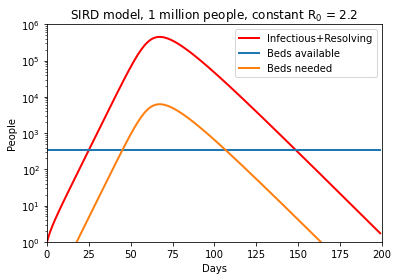

In [23]:
# .. Propagate COVID-19 with a constant beta
beta0 = 0.44                                       # infections/day/person
total_days = 200
S, I, R, D, C = propagate(beta0, gamma, theta, delta, N, total_days)

# .. Available and necessary critical care beds
plt.figure(4); plt.cla()
plt.semilogy(I+R, linewidth = 2, color = 'r', label = 'Infectious+Resolving')
plt.plot(beds_per_person*N + (I*0), linewidth = 2, label = 'Beds available')
plt.plot(hospitalization_rate*(I+R), linewidth = 2, label = 'Beds needed')
plt.legend()
plt.xlabel('Days')
plt.ylabel('People')
plt.axis([0, 200, 1, 1e6])
plt.title(r'SIRD model, 1 million people, constant R$_0$ = ' + str(np.round(beta0/gamma,2)))


0

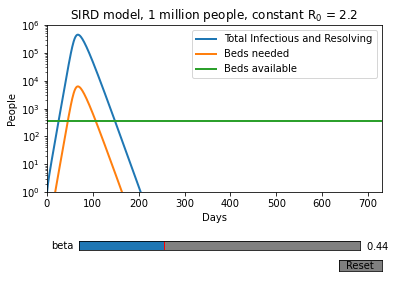

In [24]:
total_days = 365*2
beta0 = 0.44

# .. Propagate COVID-19 with a constant beta
S, I, R, D, C = propagate(beta0, gamma, theta, delta, N, total_days)

# .. Repeat the above but with a slider
fig, ax1 = plt.subplots(num=5)
plt.subplots_adjust(bottom=0.3)

infectious, = ax1.semilogy(I+R, linewidth = 2, label = 'Total Infectious and Resolving')
beds_needed, = ax1.semilogy(hospitalization_rate*(I+R), linewidth = 2, label = 'Beds needed')
beds_available, = ax1.plot(beds_per_person*N+(I*0), linewidth = 2, label = 'Beds available')
ax1.legend()
ax1.set_xlabel('Days')
ax1.set_ylabel('People')
ax1.set_title(r'SIRD model, 1 million people, constant R$_0$ = ' + str(np.round(beta0/gamma,2)))
ax1.axis([0, total_days, 1, 1e6])

# sliders
ax_beta = plt.axes([0.2, 0.1 , 0.65, 0.03], facecolor=axcolor)
s_beta = Slider(ax_beta, 'beta', 0.2, 1.0, valinit=beta0, valstep=0.01)

def update(val):    
    beta0 = s_beta.val
    
    # .. Propagate COVID-19 with a constant beta
    S, I, R, D, C = propagate(beta0, gamma, theta, delta, N, total_days)
    
    infectious.set_ydata(I+R)
    beds_needed.set_ydata(hospitalization_rate*(I+R))
    
    ax1.set_title(r'SIRD model, 1 million people, constant R$_0$ = ' + str(np.round(beta0/gamma,2)))
    ax1.axis([0, total_days, 1, 1e6])
    fig.canvas.draw_idle()
    
s_beta.on_changed(update)
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
button.on_clicked(slider_reset)


In [25]:
# Propagate Equations 1-5 forward in time
def propagate_beta_t(gamma, theta, delta, N, total_days, beta0, beta_esd, beta_rsd, 
                     fraction_to_open, fraction_to_distance):
    '''
    This code propagates Equations 1-5 forward in time
    for a time-varying beta
    
    We start with beta0 infections/person/day, assuming no social distancing.
    When the fraction of available beds that are full exceeds fraction_to_distance,
    we implement extreme social distancing (esd), using beta_esd.
    When a certain fraction of beds frees up (fraction_to_open), we relax 
    social distancing to beta_rsd.
    '''
    
    # .. The total number of beds available is constant
    beds_available = beds_per_person * N

    # .. Preallocate terms
    S = np.zeros(total_days)
    I = np.zeros(total_days)
    R = np.zeros(total_days)
    D = np.zeros(total_days)
    C = np.zeros(total_days)
    
    # .. Set 0th elements
    S[0] = N-1
    I[0] = 1
    
    beta = beta0                                        # Start with non-social-distancing beta
    state = np.zeros(total_days)                        # 0=> open, 1=> closed               
    beta_t = beta0*np.ones(total_days)                  # beta as a function of time             
    # Propagate disease forward in time
    for t in range(total_days-1):
        
        state[t+1] = state[t]
        
        # .. For each time step, get Eqns 1-5
        delta_S = - beta * S[t] * I[t]/N                    # Eqn (1)
        delta_I = beta * S[t] * I[t]/N - gamma * I[t]       # Eqn (2)
        delta_R = gamma * I[t] - theta * R[t]               # Eqn (3)
        delta_D = delta * theta * R[t]                      # Eqn (4)
        delta_C = (1-delta) * theta * R[t]                  # Eqn (5)
        
        # .. Increment S, I, R, D, and C
        S[t+1] = S[t] + delta_S                  # Susceptible
        I[t+1] = I[t] + delta_I                  # Infectious
        R[t+1] = R[t] + delta_R                  # Resolving
        D[t+1] = D[t] + delta_D                  # Deceased
        C[t+1] = C[t] + delta_C                  # ReCovered
        
        # .. Calculate how many beds are needed
        #    (note that hhospitalization_rate and days_in_hospital are global, not inputs.)
        beds_needed = hospitalization_rate * (I[t+1] + R[t+1])
        
        # .. Criterion for closing
        if (state[t] == 0) and (beds_needed >= fraction_to_distance * beds_available):        
            beta = beta_esd                          # Too many beds needed! Start extreme social distancing
            state[t+1] = 1                           # Switch state to closed
        elif (state[t] == 1) and (beds_needed < fraction_to_open * beds_available): 
            beta = beta_rsd                          # many beds, relax social distancing
            state[t+1] = 0                           # switch state to open
        
        beta_t[t+1] = beta
    return S, I, R, D, C, state, beta_t


In [26]:
# .. Propagate COVID-19 with a changing beta
total_days = 600              # length of simulation (days)
beta0 = 0.4                   # infections/day/person before social distancing
beta_esd = 0.16               # infections/day/person with extreme social distancing
beta_rsd = 0.3                # infections/day/person with relaxed social distancing
fraction_to_open = 0.05       # fraction of beds occupied to trigger opening
fraction_to_distance = 0.9    # fraction of beds occupied to trigger distancing

S, I, R, D, C, state, beta_t = propagate_beta_t(gamma, theta, delta, N, total_days, beta0, beta_esd, 
                                                beta_rsd, fraction_to_open, fraction_to_distance)

R0 = beta0 / gamma                     # Basic reproduction number
print('Starting R0 = beta0 / gamma: ', np.round(beta0 / gamma,2))       
print('Extreme social distancing R0 = beta_esd / gamma: ',  np.round(beta_esd / gamma,2))        
print('Relaxed social distancing R0 = beta_rsd / gamma: ',  np.round(beta_rsd / gamma,2))      


Starting R0 = beta0 / gamma:  2.0
Extreme social distancing R0 = beta_esd / gamma:  0.8
Relaxed social distancing R0 = beta_rsd / gamma:  1.5


Text(0.5, 0, 'date')

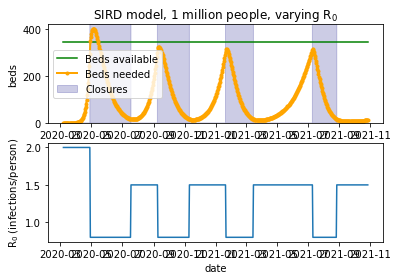

In [27]:
# Add the date, starting with day 0 = March 1, 2020
date_vec = [dt.datetime(2020,3,7) + dt.timedelta(i) for i in range(total_days)]

# .. Available and necessary critical care beds
plt.figure(6); plt.cla()
plt.subplot(211)
plt.plot(date_vec, 0*I + beds_per_person*N, 'g', label = 'Beds available')
plt.plot(date_vec, hospitalization_rate*(I+R), '.-', color = 'orange', linewidth = 2, label = 'Beds needed')
plt.fill_between(date_vec, 1000*state*beds_per_person*N, 0,
                 color='navy',                           # The outline color
                 alpha=0.2, label = 'Closures')          # Transparency of the fill
plt.legend()
plt.ylabel('beds')
plt.ylim(top=420)
plt.ylim(bottom=0)
plt.title(r'SIRD model, 1 million people, varying R$_0$')
plt.subplot(212)
plt.plot(date_vec, beta_t/gamma)
plt.ylabel(r'R$_0$ (infections/person)')
plt.xlabel('date')


0

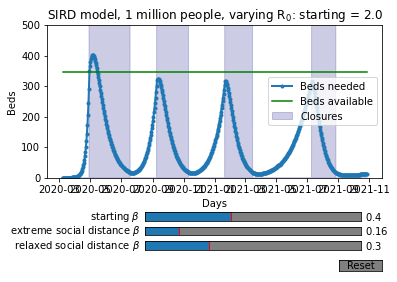

In [28]:
# .. Propagate COVID-19 with a changing beta
total_days = 600              # length of simulation (days)
beta0 = 0.4                   # infections/day/person before social distancing
beta_esd = 0.16               # infections/day/person with extreme social distancing
beta_rsd = 0.3                # infections/day/person with softer social distancing
fraction_to_open = 0.05       # fraction of beds occupied to trigger opening
fraction_to_distance = 0.9    # fraction of beds occupied to trigger distancing

date_vec = [dt.datetime(2020,3,7) + dt.timedelta(i) for i in range(total_days)]

# .. Repeat the above but with a slider
fig, ax1 = plt.subplots(num = 7)
plt.subplots_adjust(bottom = 0.35)

# .. Propagate COVID-19 with changing beta
S, I, R, D, C, state, beta_t = propagate_beta_t(gamma, theta, delta, N, total_days, beta0, beta_esd, 
                                                beta_rsd, fraction_to_open, fraction_to_distance)

beds_needed, = ax1.plot(date_vec, hospitalization_rate*(I+R), '.-', linewidth = 2, label = 'Beds needed')
ax1.plot(date_vec, 0*I + beds_per_person*N, 'g', label = 'Beds available')
fillbet = ax1.fill_between(date_vec, 10*state*beds_per_person*N, 0,
                 color='navy',                                 # The outline color
                 alpha=0.2 , label = 'Closures')               # Transparency of the fill       

ax1.legend()
ax1.set_xlabel('Days')
ax1.set_ylabel('Beds')
ax1.set_title(r'SIRD model, 1 million people, varying R$_0$: starting = ' + str(np.round(beta0/gamma,2)))
ax1.set_ylim([0, 500])

# sliders
ax_beta0     = plt.axes([0.35, 0.2, 0.5, 0.03], facecolor=axcolor)
ax_beta_esd  = plt.axes([0.35, 0.15, 0.5, 0.03], facecolor=axcolor)
ax_beta_rsd  = plt.axes([0.35, 0.1, 0.5, 0.03], facecolor=axcolor)

s_beta0    = Slider(ax_beta0, r'starting $\beta$', 0.0, 1.0, valinit=beta0, valstep=0.01)
s_beta_esd = Slider(ax_beta_esd, r'extreme social distance $\beta$', 0.0, 1.0, valinit=beta_esd, valstep=0.01)
s_beta_rsd = Slider(ax_beta_rsd, r'relaxed social distance $\beta$', 0.0, 1.0, valinit=beta_rsd, valstep=0.01)

# .. The reset button on the slider
def multi_slider_reset(event):
    s_beta0.reset()
    s_beta_esd.reset()
    s_beta_rsd.reset()

def update(val):    
    beta0 = s_beta0.val
    beta_esd = s_beta_esd.val
    beta_rsd = s_beta_rsd.val
    
    # .. Propagate COVID-19 with a constant beta
    S, I, R, D, C, state, beta = propagate_beta_t(gamma, theta, delta, N, 
                                                  total_days, beta0, beta_esd, 
                                                  beta_rsd, fraction_to_open, 
                                                  fraction_to_distance)
    beds_needed.set_ydata(hospitalization_rate*(I+R))
    global fillbet
    fillbet.remove()
    fillbet = ax1.fill_between(date_vec, 10*state*beds_per_person*N, 0,
                 color='navy',             # The outline color
                 alpha=0.2 )               # Transparency of the fill
    
    ax1.set_title(r'SIRD model, 1 million people, varying R$_0$')
    ax1.set_ylim([0, 500])
    fig.canvas.draw_idle()
    
s_beta0.on_changed(update)
s_beta_esd.on_changed(update)
s_beta_rsd.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
    
button.on_clicked(multi_slider_reset)


0

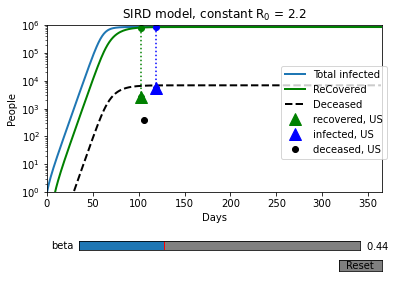

In [29]:
total_days = 365
day_no = np.arange(total_days)
beta0 = 0.44

# .. Repeat the above but with a slider
fig, ax1 = plt.subplots(num=8)

plt.subplots_adjust(bottom=0.3)

# .. Propagate COVID-19 with a constant beta
S, I, R, D, C = propagate(beta0, gamma, theta, delta, N, total_days)

infected, = ax1.semilogy((N-S), linewidth=2, label='Total infected')
recovered, = ax1.plot(C, color = 'green', linewidth=2, label='ReCovered')
dead, = ax1.semilogy(D, 'k--', linewidth=2, label='Deceased')

# .. Draw a verical line to the graph point intersection
recovered_interp, = ax1.plot([102, 102], [2714, np.interp(102, day_no, C)], 'go:')
infected_interp, = ax1.plot([119, 119], [5500, np.interp(119, day_no, N-S)], 'bo:')

# .. Plot some actual data
ax1.plot(102, 2714, 'g^', markersize = 12, label='recovered, US')
ax1.plot(119, 5500, 'b^', markersize = 12, label='infected, US')
ax1.plot(106, 393.6 ,'ko', label='deceased, US')

ax1.legend(loc=[.7,.2])
ax1.set_xlabel('Days')
ax1.set_ylabel('People')
ax1.axis([0, total_days, 1, 1e6])
ax1.set_title('SIRD model, constant R$_0$ = ' + str(np.round(beta0 / gamma,2)))

# sliders
axcolor = 'grey'
ax_beta = plt.axes([0.2, 0.1 , 0.65, 0.03], facecolor=axcolor)
s_beta = Slider(ax_beta, 'beta', 0.2, 1.0, valinit=beta0, valstep=0.005)

def update(val):
    
    beta0 = s_beta.val
    
    # .. Propagate COVID-19 with a constant beta
    S, I, R, D, C = propagate(beta0, gamma, theta, delta, N, total_days)

    infected.set_ydata((N-S))
    recovered.set_ydata(C)    
    dead.set_ydata(D)
    
    recovered_interp.set_ydata([2714, np.interp(102, day_no, C)])
    infected_interp.set_ydata([5500, np.interp(119, day_no, N-S)])
    
    ax1.set_title('SIRD model, 1 million people, R$_0$ = ' + str(np.round(beta0 / gamma, 2)))
    fig.canvas.draw_idle()
    
s_beta.on_changed(update)
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

button.on_clicked(slider_reset)
